In [3]:
import numpy as np
import pandas as pd
import Algorithmia
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
#need to load data first
Data=pd.read_csv('data.csv')

In [5]:
Data['ratingNum']=0
for i in range(Data.shape[0]):
    Data.loc[i,'ratingNum']=int(Data.loc[i,'rating'][6])
Data

,category,rating,name,app,date,review,ratingNum
0,Top Free in Android Apps,Rated 1 stars out of five stars,D Th,FOX Sports GO,"February 5, 2017",Downloaded the app to watch the superebowl fro...,1
1,Top Free in Android Apps,Rated 5 stars out of five stars,Sophie Gordon,Kika Emoji Keyboard Pro + GIFs,"February 2, 2017",Great app! The predictive text works better th...,5
2,Top Free in Android Apps,Rated 5 stars out of five stars,Srinidhi Karthik B S,Amazon Shopping,"January 27, 2017",I love Amazon. This is the first time I felt p...,5
3,Top Free in Android Apps,Rated 1 stars out of five stars,Christie Craft,FOX Sports GO,"February 5, 2017",So the reason you decided to NOT allow us to w...,1
4,Top Free in Android Apps,Rated 1 stars out of five stars,Lucas Don Velure,FOX Sports GO,"January 28, 2017",Works for exactly one time. Then needs to be r...,1
5,Top Free in Android Apps,Rated 4 stars out of five stars,Tim Hefty,FOX Sports GO,"February 5, 2017",I really really really want to like this app b...,4
6,Top Free in Android Apps,Rated 3 stars out of five stars,Chance Diggz,FOX Sports GO,"February 5, 2017",Truly suckz that the android app doesn't show ...,3
7,Top Free in Android Apps,Rated 1 stars out of five stars,Russell Morrisey,FOX Sports GO,"February 6, 2017",Chromecasted the Superbowl to save money on ca...,1
8,Top Free in Android Apps,Rated 1 stars out of five stars,Matt Ballard,FOX Sports GO,"February 5, 2017",Advertised that I can stream the Superbowl thr...,1
9,Top Free in Android Apps,Rated 2 stars out of five stars,Tyler Aragon,FOX Sports GO,"January 22, 2017","Kept erroring with a ""null"" error message and ...",2


In [ ]:
####################################Top Free Apps########################################

In [164]:
TFreeApps=Data.loc[Data.category=="Top Free in Android Apps",]
#see the range Top Free
TFreeApps['ratingNum'].value_counts().sort_index()
TFreeApps['sentiment']=0

/Users/gaoxu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


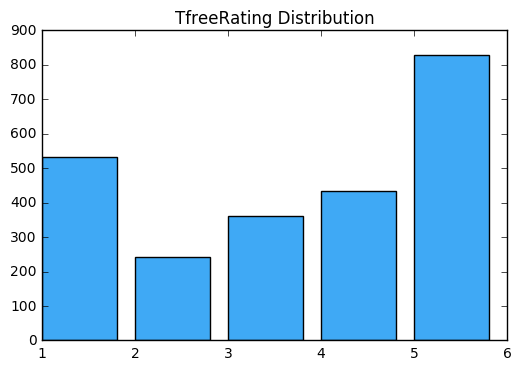

In [48]:
plt.bar(range(1,6),TFreeApps['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TfreeRating Distribution")

In [6]:
def senti(dic):
    input=dic
    client = Algorithmia.client('simsUg+f0SezSAaGl4ybqtsW9We1')
    algo = client.algo('nlp/SentimentAnalysis/1.0.3')
    return algo.pipe(input).result[0]['sentiment']
##this function uses sentiment analysis from Algorithmia to return a sentiment analysis 

In [221]:
for i in range(0,2400):
    review={'document': TFreeApps.iloc[i,5]}
    TFreeApps.iloc[i,7]=senti(review)

In [254]:
TFreeApps.to_csv("TFreeApps.csv")

In [252]:
###scatterplot for rating and sentiment

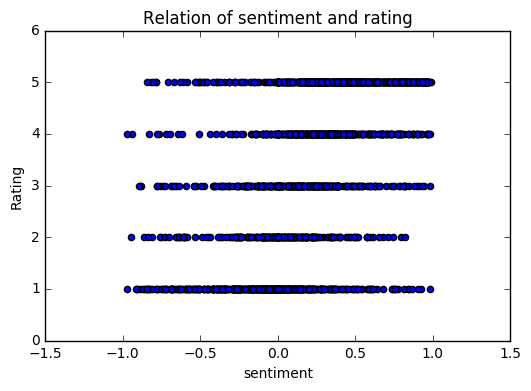

In [253]:
plt.scatter(TFreeApps['sentiment'],TFreeApps['ratingNum'])
plt.title("Relation of sentiment and rating")
plt.xlabel("sentiment")
plt.ylabel("Rating")

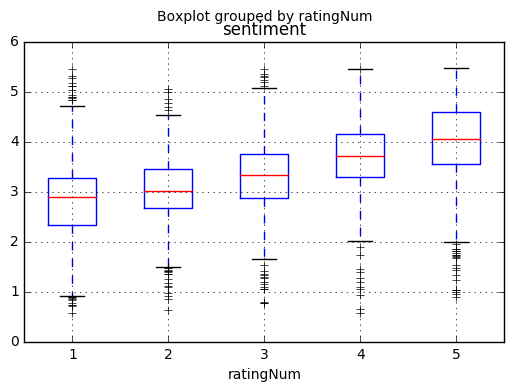

In [240]:
df2=TFreeApps[['ratingNum','sentiment']].dropna()
df2.boxplot(by='ratingNum',column='sentiment')

In [ ]:
########################################TOP Paid########################################

In [227]:
TPaidApps=Data.loc[Data.category=="Top Paid in Android Apps",]
#see the range Top Free
TPaidApps['sentiment']=0
TPaidApps['ratingNum'].value_counts().sort_index()


/Users/gaoxu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


1     399
2     221
3     286
4     421
5    1073
Name: ratingNum, dtype: int64

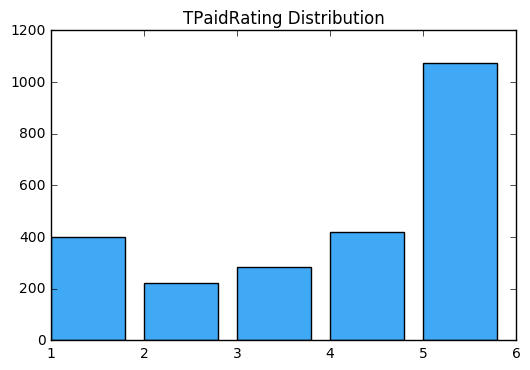

In [229]:
plt.bar(range(1,6),TPaidApps['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TPaidRating Distribution")

In [241]:
for i in range(TPaidApps.shape[0]):
    review={'document': TPaidApps.iloc[i,5]}
    TPaidApps.iloc[i,7]=senti(review)

In [243]:
TPaidApps.to_csv("TPaidApps.csv")

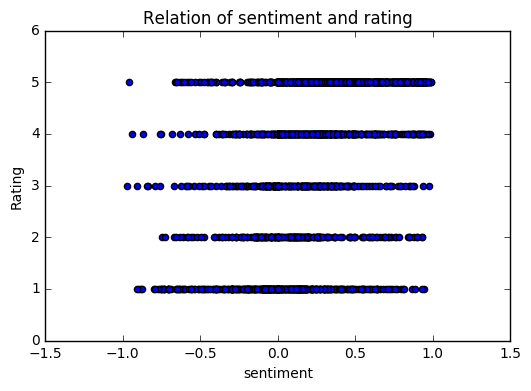

In [244]:
plt.scatter(TPaidApps['sentiment'],TPaidApps['ratingNum'])
plt.title("Relation of sentiment and rating")
plt.xlabel("sentiment")
plt.ylabel("Rating")

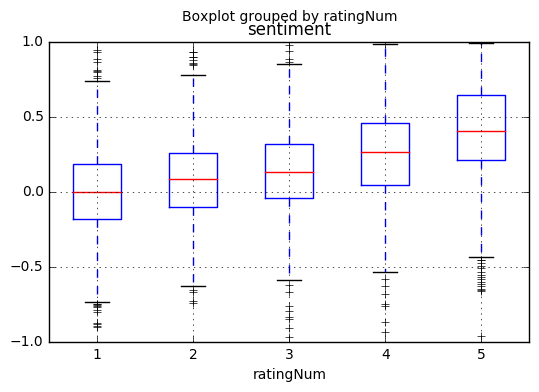

In [245]:
df3=TPaidApps[['ratingNum','sentiment']].dropna()
df3.boxplot(by='ratingNum',column='sentiment')

In [ ]:
####################################Top Grossing Game#############################

In [7]:

TGrossGame=Data.loc[Data.category=="Top Grossing Games",]
#see the range Top Free
TGrossGame['sentiment']=0
TGrossGame['ratingNum'].value_counts().sort_index()



/Users/gaoxu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    522
2    185
3    289
4    251
5    593
Name: ratingNum, dtype: int64

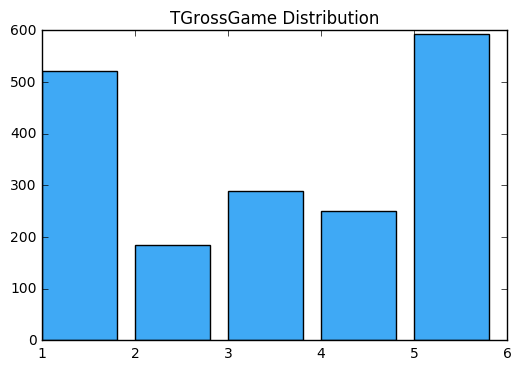

In [247]:
plt.bar(range(1,6),TGrossGame['ratingNum'].value_counts().sort_index(),color="#3fa9f5")
plt.title("TGrossGame Distribution")

In [8]:
for i in range(TGrossGame.shape[0]):
    review={'document': TGrossGame.iloc[i,5]}
    TGrossGame.iloc[i,7]=senti(review)

/Users/gaoxu/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
TGrossGame.to_csv("TGrossGame.csv")

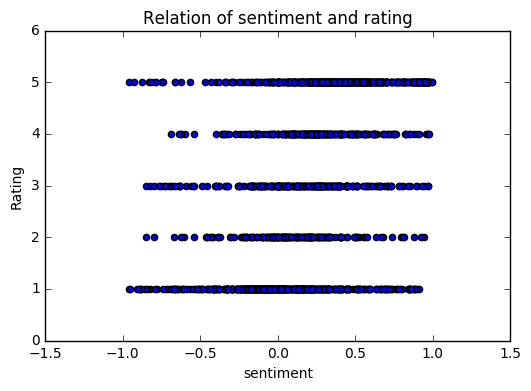

In [250]:
plt.scatter(TGrossGame['sentiment'],TGrossGame['ratingNum'])
plt.title("Relation of sentiment and rating")
plt.xlabel("sentiment")
plt.ylabel("Rating")

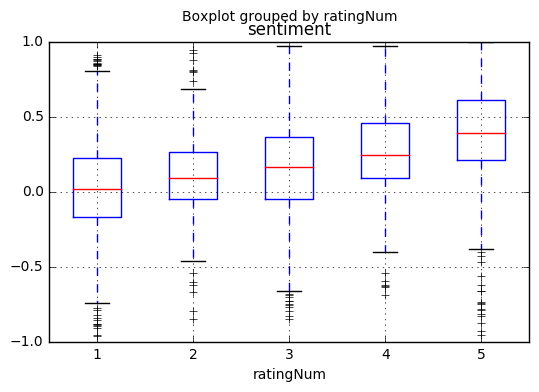

In [251]:
df4=TGrossGame[['ratingNum','sentiment']].dropna()
df4.boxplot(by='ratingNum',column='sentiment')

In [1]:
from scipy.stats import gaussian_kde
TFreeApps=pd.read_csv("TFreeApps.csv")
TFdensity=gaussian_kde(TFreeApps['sentiment'])
TPdensity=gaussian_kde(TPaidApss['sentiment'])
TGdensity=gaussian_kde(TGrossGame['sentiment'])

NameError: name 'TFreeApps' is not defined